# Abalone: exploratory data analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_numeric_dtype

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
def standardize(df):
    ''' Returns an standardized copy of the dataframe.'''
    
    std_df = df.copy()
    
    for col in df.columns:
        if is_numeric_dtype(std_df[col]):
            std_df[col] = (std_df[col] - std_df[col].mean()) / std_df[col].std()
    
    return std_df

In [3]:
abalone = pd.read_csv('data/abalone.data', sep=',')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Univariate Analysis

In this section the distribution of each attribute is analyzed. 

### The Target Attribute

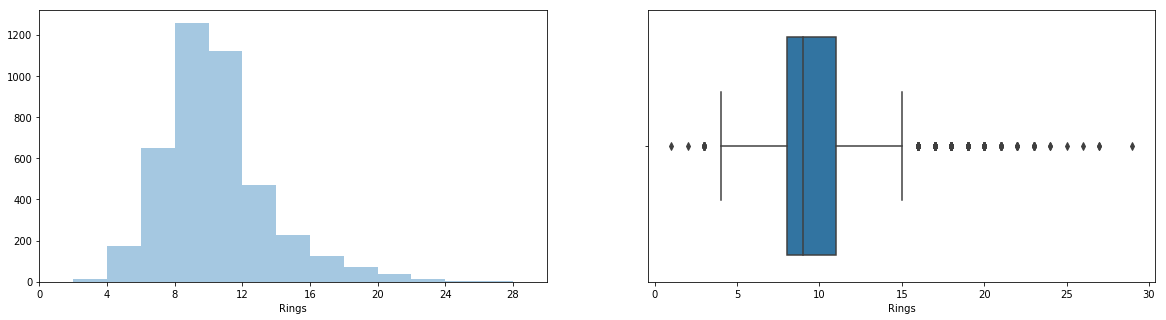

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(abalone['Rings'], kde=False, bins=range(0, 31, 2))

plt.subplot(1, 2, 2)
_ = sns.boxplot(abalone['Rings'])

### Size Attributes

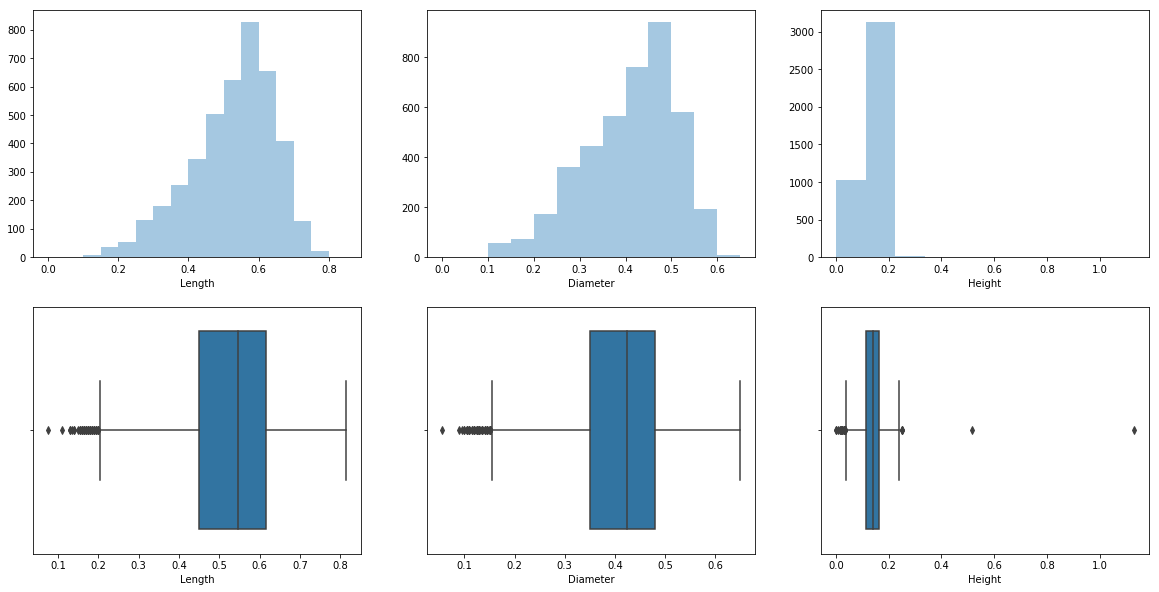

In [7]:
plt.figure(figsize=(20, 10))

lines = 2
rows = 3

plt.subplot(lines, rows, 1)
_ = sns.distplot(abalone['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05))
    
plt.subplot(lines, rows, 2)
_ = sns.distplot(abalone['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05))

plt.subplot(lines, rows, 3)
_ = sns.distplot(abalone['Height'], kde=False, bins=10)

plt.subplot(lines, rows, 4)
_ = sns.boxplot(abalone['Length'])

plt.subplot(lines, rows, 5)
_ = sns.boxplot(abalone['Diameter'])

plt.subplot(lines, rows, 6)
_ = sns.boxplot(abalone['Height'])

In [8]:
# removing outliers 
abalone = abalone[abalone['Height'] < 0.4]

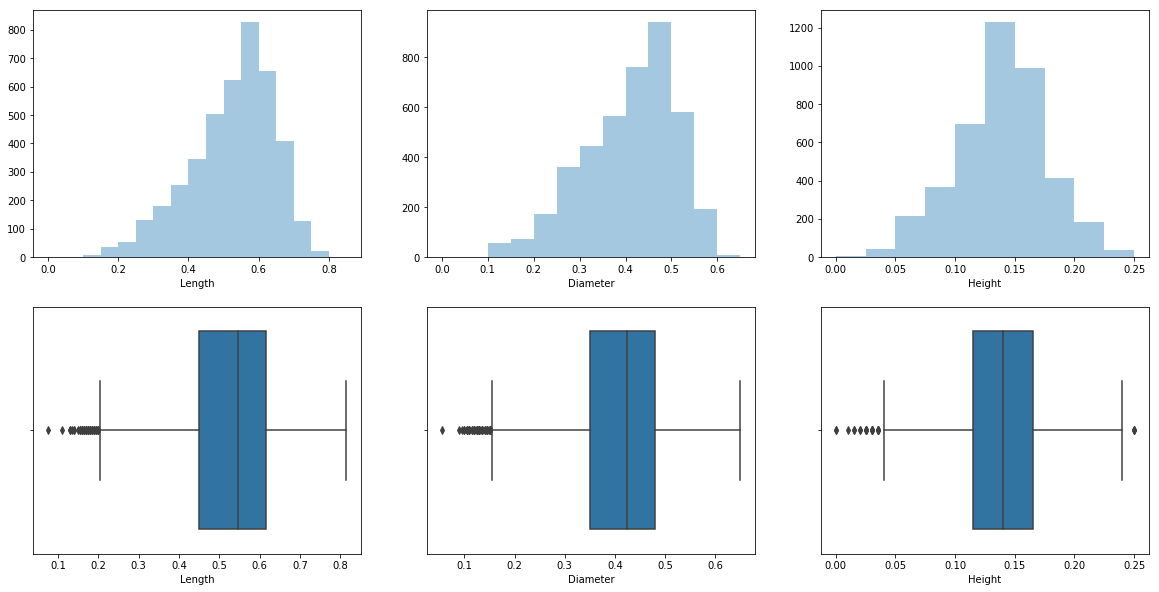

In [9]:
plt.figure(figsize=(20, 10))

lines = 2
rows = 3

plt.subplot(lines, rows, 1)
_ = sns.distplot(abalone['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05))
    
plt.subplot(lines, rows, 2)
_ = sns.distplot(abalone['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05))

plt.subplot(lines, rows, 3)
_ = sns.distplot(abalone['Height'], kde=False, bins=10)

plt.subplot(lines, rows, 4)
_ = sns.boxplot(abalone['Length'])

plt.subplot(lines, rows, 5)
_ = sns.boxplot(abalone['Diameter'])

plt.subplot(lines, rows, 6)
_ = sns.boxplot(abalone['Height'])

### Weight Attributes

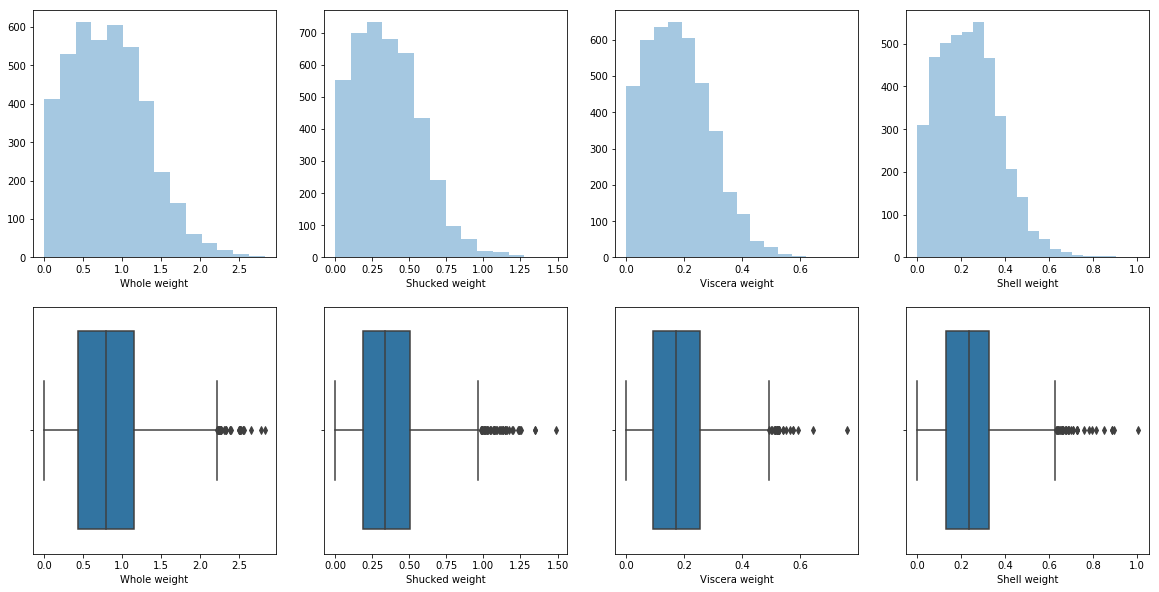

In [10]:
plt.figure(figsize=(20, 10))

rows = 2
cols = 4

plt.subplot(rows, cols, 1)
_ = sns.distplot(abalone['Whole weight'], kde=False, bins=14)
    
plt.subplot(rows, cols, 2)
_ = sns.distplot(abalone['Shucked weight'], kde=False, bins=14)

plt.subplot(rows, cols, 3)
_ = sns.distplot(abalone['Viscera weight'], kde=False, bins=16)

plt.subplot(rows, cols, 4)
_ = sns.distplot(abalone['Shell weight'], kde=False, bins=20)

plt.subplot(rows, cols, 5)
_ = sns.boxplot(abalone['Whole weight'])

plt.subplot(rows, cols, 6)
_ = sns.boxplot(abalone['Shucked weight'])

plt.subplot(rows, cols, 7)
_ = sns.boxplot(abalone['Viscera weight'])

plt.subplot(rows, cols, 8)
_ = sns.boxplot(abalone['Shell weight'])

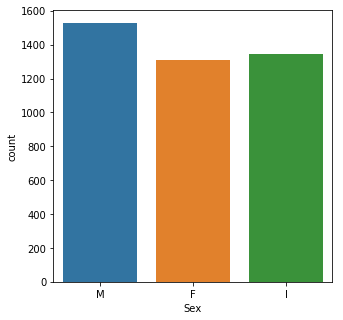

In [6]:
plt.figure(figsize=(5,5))
_ = sns.countplot(abalone.Sex)

## Multivariate Analysis

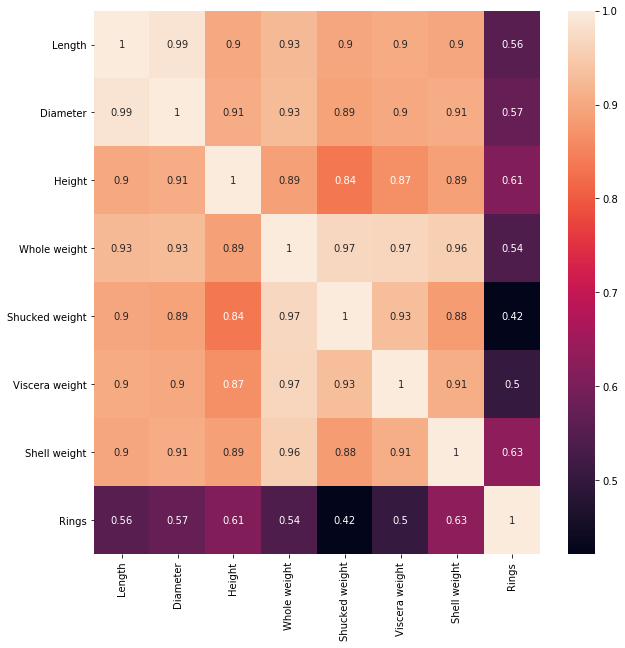

In [11]:
plt.figure(figsize=(10, 10))
corr = abalone.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

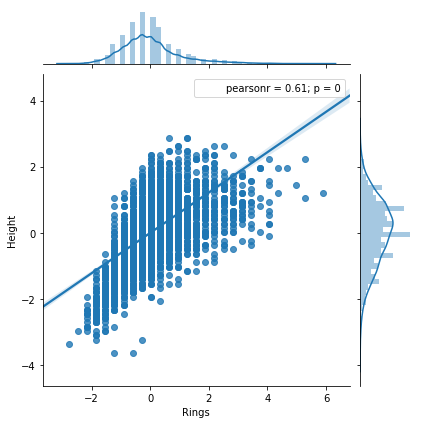

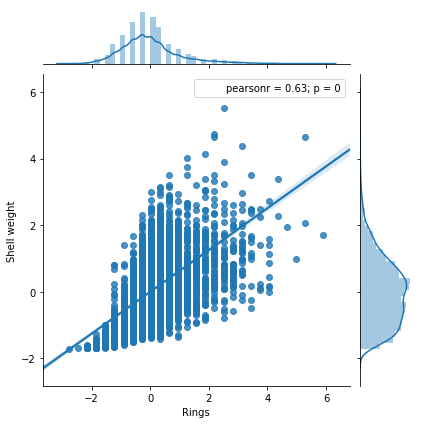

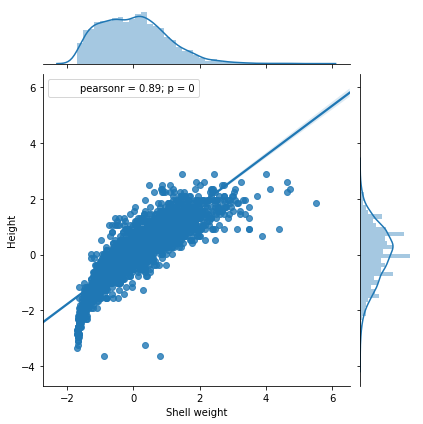

In [48]:
abalone_std = standardize(abalone)

plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=abalone_std, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=abalone_std, x='Rings', y='Shell weight', kind='reg')
_ = sns.jointplot(data=abalone_std, x='Shell weight', y='Height', kind='reg')

## Influence of Sex on attributes

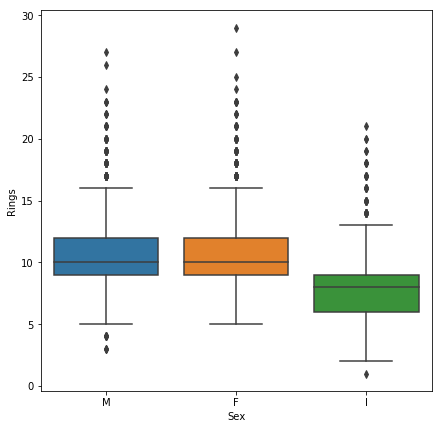

In [14]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone, x='Sex', y='Rings')

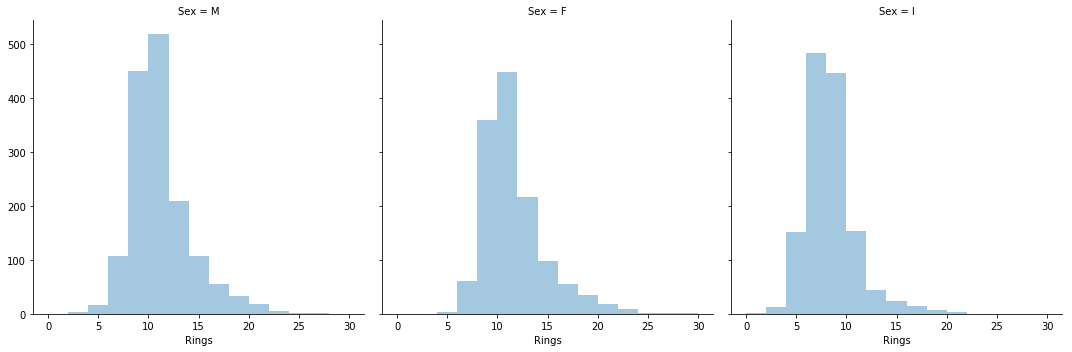

In [15]:
g = sns.FacetGrid(abalone, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2))

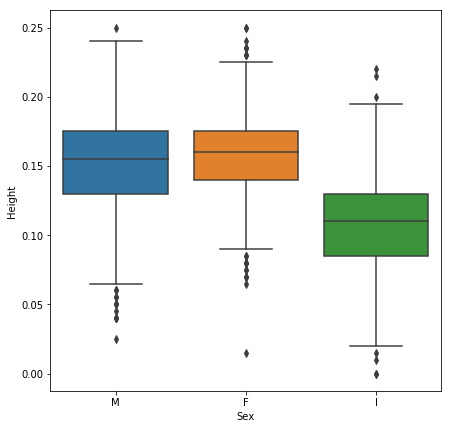

In [16]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone, x='Sex', y='Height')

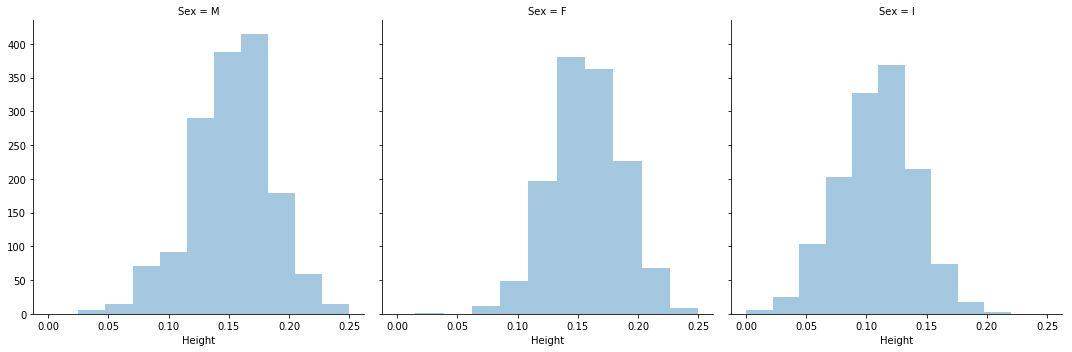

In [17]:
g = sns.FacetGrid(abalone, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

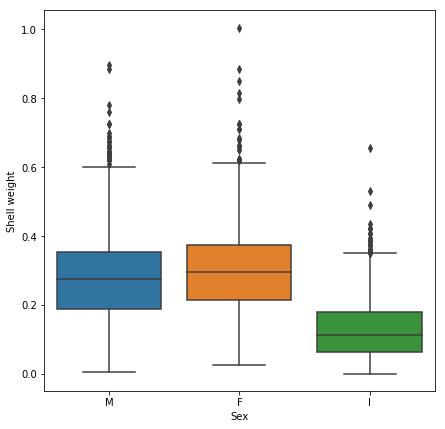

In [18]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone, x='Sex', y='Shell weight')

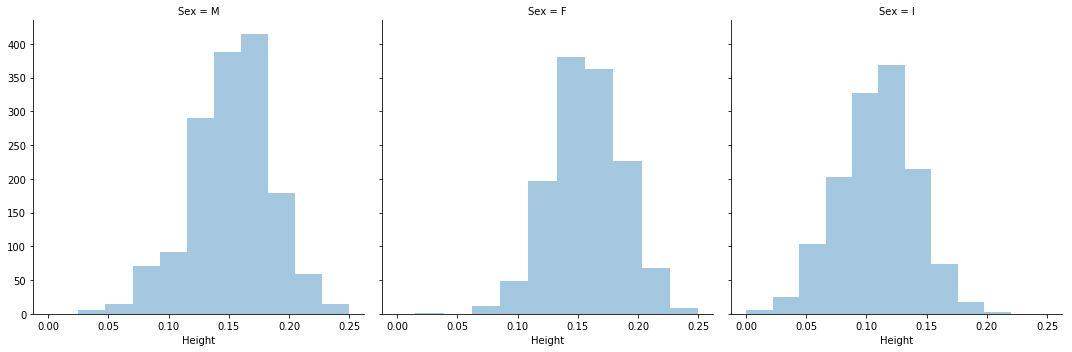

In [19]:
g = sns.FacetGrid(abalone, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

## How correlation varies with the number of rings

In [20]:
i_abalone = abalone[abalone['Sex'] == 'I']

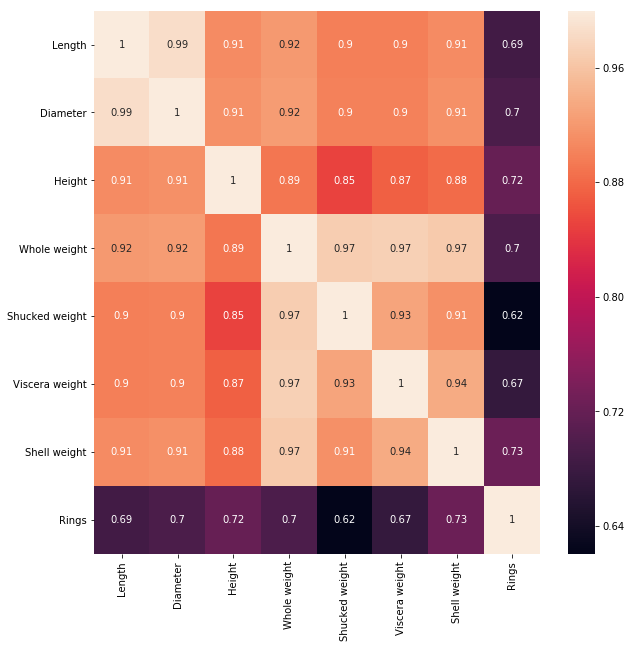

In [21]:
plt.figure(figsize=(10, 10))
corr = i_abalone.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

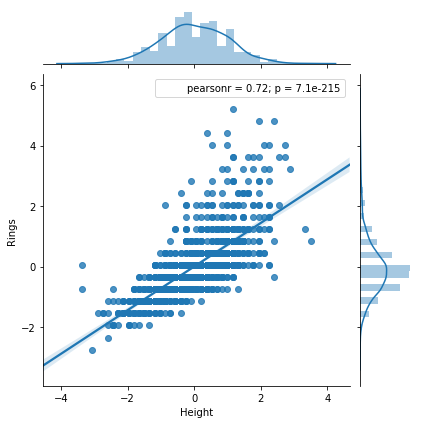

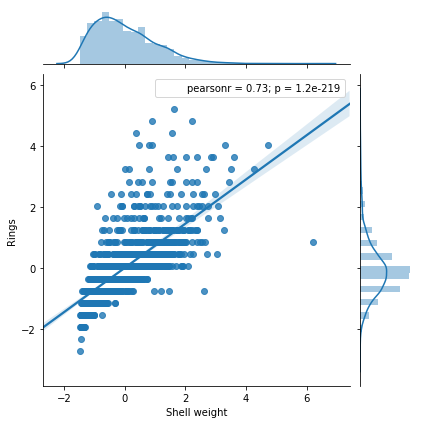

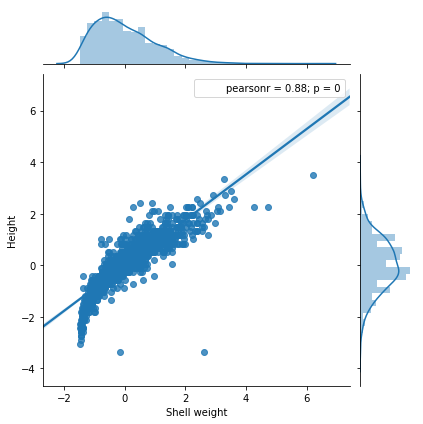

In [55]:
i_abalone_std = standardize(i_abalone)

plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_abalone_std, x='Height', y='Rings', kind='reg')
_ = sns.jointplot(data=i_abalone_std, x='Shell weight', y='Rings', kind='reg')
_ = sns.jointplot(data=i_abalone_std, x='Shell weight', y='Height', kind='reg')

In [25]:
a_abalone = abalone[abalone['Sex'] != 'I']

plt.figure(figsize=(10, 10))
corr = a_abalone.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x720 with 0 Axes>

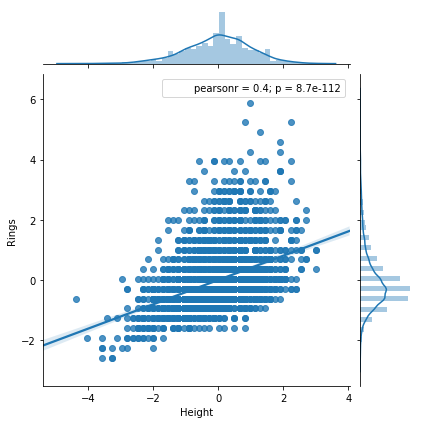

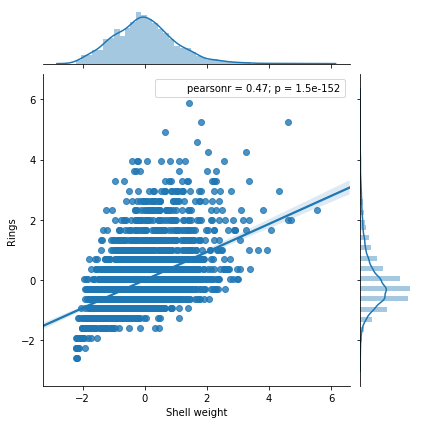

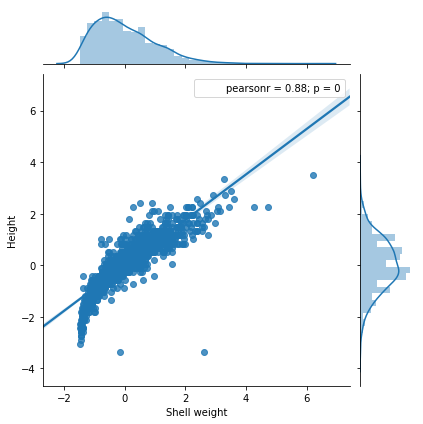

In [56]:
a_abalone_std = standardize(a_abalone)

plt.figure(figsize=(20, 10))

_ = sns.jointplot(data=a_abalone_std, x='Height', y='Rings', kind='reg')
_ = sns.jointplot(data=a_abalone_std, x='Shell weight', y='Rings', kind='reg')
_ = sns.jointplot(data=i_abalone_std, x='Shell weight', y='Height', kind='reg')

In [30]:
e_abalone = abalone[abalone['Rings'] > 15]

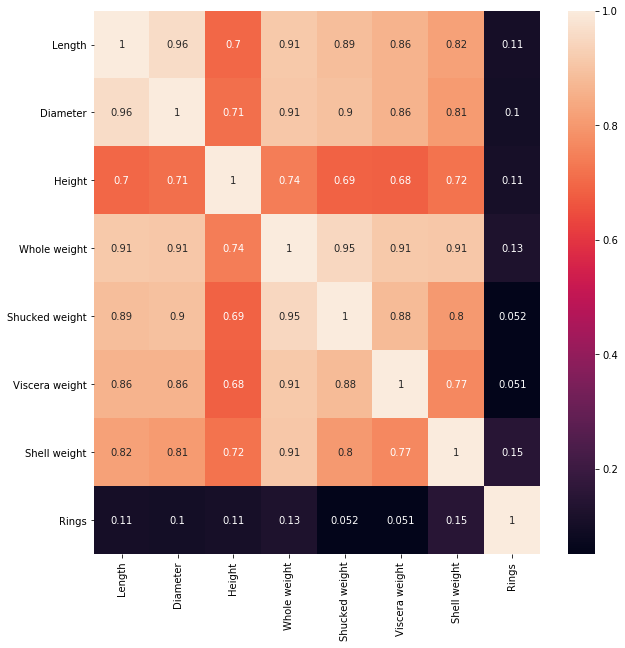

In [31]:
plt.figure(figsize=(10, 10))
corr = e_abalone.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

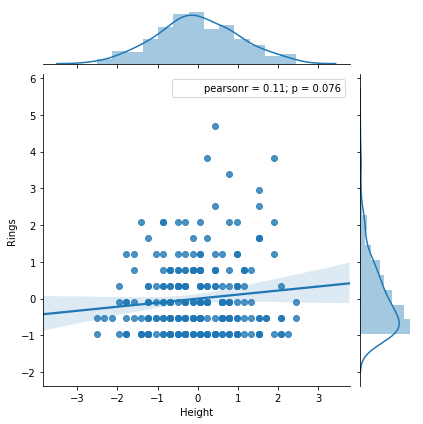

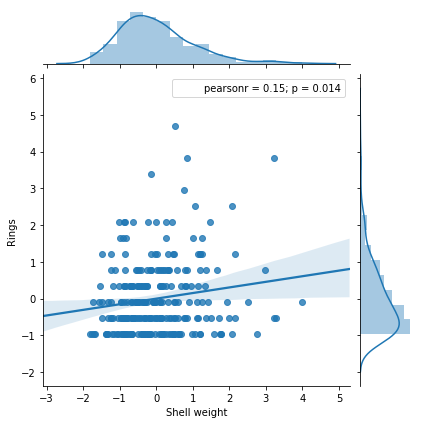

In [42]:
e_abalone_std = standardize(e_abalone)

plt.figure(figsize=(20, 5))
_ = sns.jointplot(data=e_abalone_std, x='Height', y='Rings', kind='reg')
_ = sns.jointplot(data=e_abalone_std, x='Shell weight', y='Rings', kind='reg')

## Conclusions

* The weight of the Abalones varies proportional to their sizes
* There's no significant differences in size, weight and numbers of rigns between male/female abalones
* The Infant Abalones groups presents lower mean values of size, weight and number of rings 
* The weight and height of abalones varies accordingly to age until the adult age, after adult life size and weight stops varying, and after 16.5 years (15 rings) these measurements aren't correlated